# **FOR INSTALLATION OF OPENCV_CONTRIB**

In [3]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,068 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,601 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,412 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security InReleas

#**Task 1 SIFT Feature Extraction**

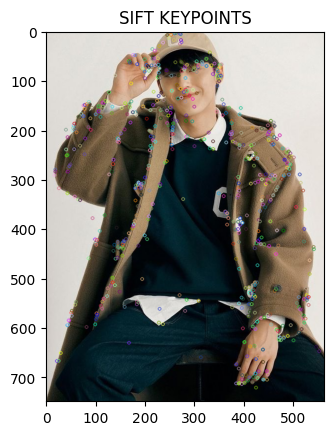

In [6]:
import cv2
import matplotlib.pyplot as plt

#Load Image
image = cv2.imread("/content/dohyun.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize sift detector
sift = cv2.SIFT_create()

#Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

#Display image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT KEYPOINTS")
plt.show()

# **Task 2 Surf Feature Extraction**

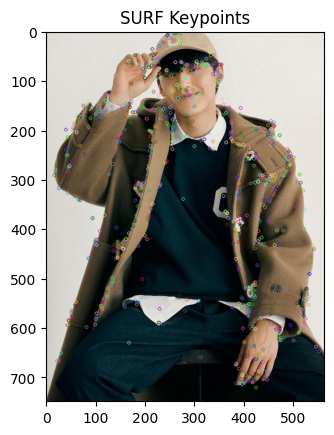

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/dohyun.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

# **Task 3 ORB Feature Extraction**

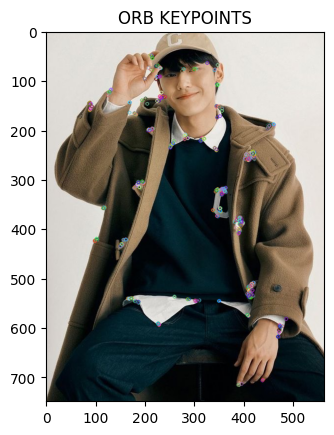

In [14]:
# Read the image
image = cv2.imread("/content/dohyun.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the result
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB KEYPOINTS")
plt.show()

# **Task 4 Feature Matching**

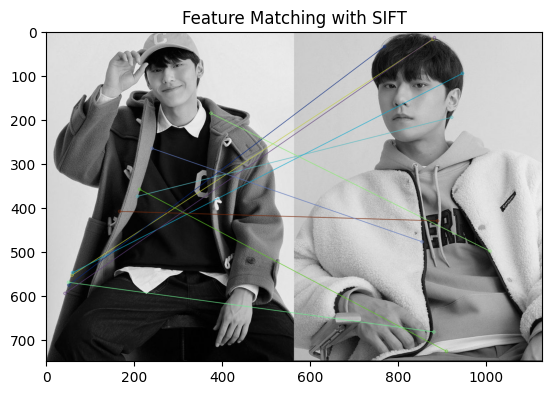

In [15]:
# Load two images
image1 = cv2.imread('/content/dohyun.jpg', 0)
image2 = cv2.imread('/content/dohyun2.jpg', 0)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

# **Task 5 Applications of Feature Matching**

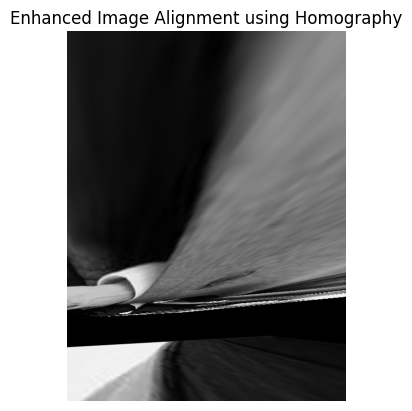

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images in grayscale
image1 = cv2.imread('/content/dohyun.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/dohyun2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to find good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
if len(good_matches) > 4:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography matrix with adjusted RANSAC threshold
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)

    # Warp one image to align with the other
    h, w = image1.shape
    result = cv2.warpPerspective(image1, M, (w, h), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)

    # Display the result
    plt.imshow(result, cmap='gray')
    plt.title('Enhanced Image Alignment using Homography')
    plt.axis('off')
    plt.show()
else:
    print(f"Not enough good matches were found: {len(good_matches)}/4")

# **Task 6 Combining Feature Extraction Methods**

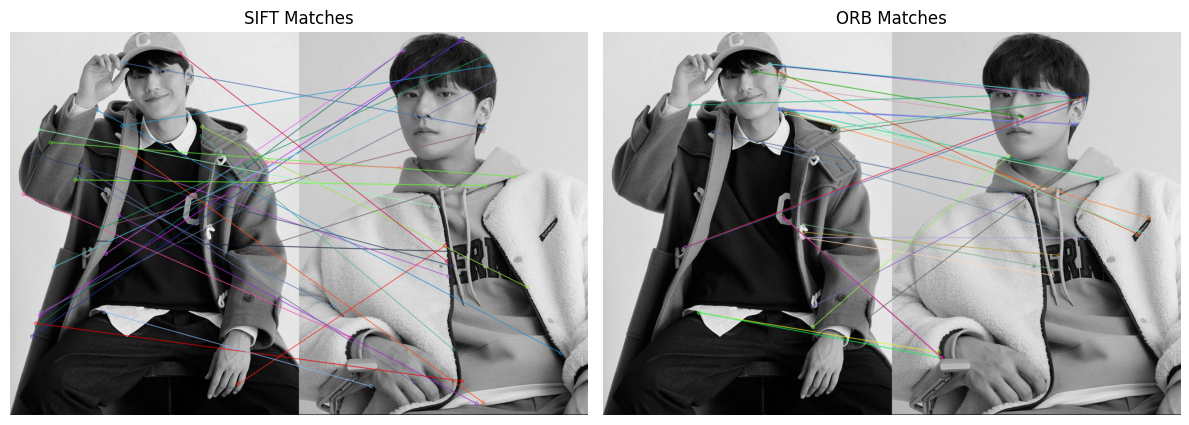

In [22]:
import cv2

# Load two images
image1 = cv2.imread('/content/dohyun.jpg', 0)
image2 = cv2.imread('/content/dohyun2.jpg', 0)

# SIFT detector
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# ORB Detector
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Display the result
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

image_sift_matches = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

image_orb_matches = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_sift_matches)
plt.title('SIFT Matches')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_orb_matches)
plt.title('ORB Matches')
plt.axis('off')

plt.tight_layout()
plt.show()